In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
corruption_type= "rotation"

df1 = pd.read_csv("results/MNIST_softmax_{}.csv".format(corruption_type))
df2 = pd.read_csv("results/MNIST_evidence_{}.csv".format(corruption_type))
df3 = pd.read_csv("results/MNIST_evidence_regularized_{}.csv".format(corruption_type))

In [3]:
df1

,accuracy,uncertainty,corruption_level,uncertainty_var,expected_calibration_error
0,0.9882,0.003983,-360.000000,0.000880,0.000528
1,0.7385,0.062653,-322.105263,0.014397,0.043232
2,0.1749,0.103696,-284.210526,0.019497,0.532240
3,0.1703,0.085720,-246.315789,0.015467,0.564844
4,0.2730,0.079528,-208.421053,0.014725,0.422714
5,0.3576,0.052675,-170.526316,0.010799,0.350014
6,0.2295,0.094176,-132.631579,0.018247,0.469024
7,0.1305,0.096949,-94.736842,0.017986,0.610634
8,0.2536,0.076848,-56.842105,0.014502,0.456724
9,0.9284,0.017827,-18.947368,0.003948,0.005784


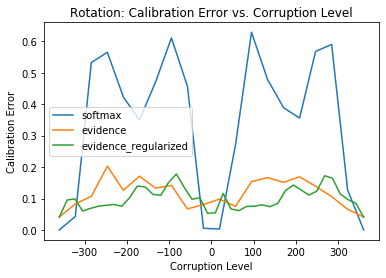

In [4]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(df1["corruption_level"], df1["expected_calibration_error"], label="softmax")
ax.plot(df2["corruption_level"], df2["expected_calibration_error"], label="evidence")
ax.plot(df3["corruption_level"], df3["expected_calibration_error"], label="evidence_regularized")

ax.set_xlabel("Corruption Level")
ax.set_ylabel("Calibration Error")
ax.set_title("{}: Calibration Error vs. Corruption Level".format(corruption_type.capitalize()))

plt.legend()
plt.savefig("figs/paper/{}_calibration_error.pdf".format(corruption_type))

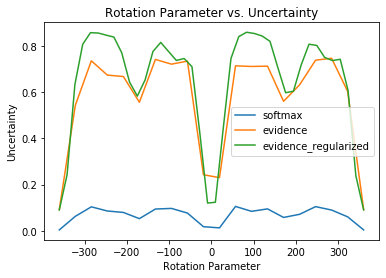

In [5]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(df1["corruption_level"], df1["uncertainty"], label="softmax")
ax.plot(df2["corruption_level"], df2["uncertainty"], label="evidence")
ax.plot(df3["corruption_level"], df3["uncertainty"], label="evidence_regularized")
ax.set_xlabel("{} Parameter".format(corruption_type.capitalize()))
ax.set_ylabel("Uncertainty")
ax.set_title("{} Parameter vs. Uncertainty".format(corruption_type.capitalize()))
plt.legend()

plt.savefig("figs/paper/{}_uncertainty.pdf".format(corruption_type))


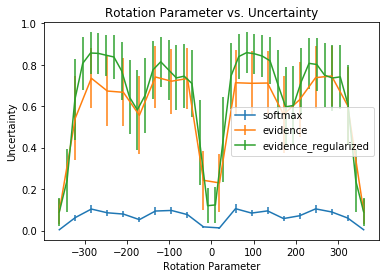

In [6]:
f = plt.figure()
ax = f.add_subplot(111)
ax.errorbar(df1["corruption_level"], df1["uncertainty"], df1["uncertainty_var"], label="softmax")
ax.errorbar(df2["corruption_level"], df2["uncertainty"], df2["uncertainty_var"], label="evidence")
ax.errorbar(df3["corruption_level"], df3["uncertainty"], df3["uncertainty_var"], label="evidence_regularized")
ax.set_xlabel("{} Parameter".format(corruption_type.capitalize()))
ax.set_ylabel("Uncertainty")
ax.set_title("{} Parameter vs. Uncertainty".format(corruption_type.capitalize()))
plt.legend()

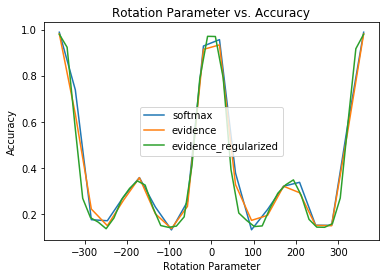

In [7]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(df1["corruption_level"], df1["accuracy"], label="softmax")
ax.plot(df2["corruption_level"], df2["accuracy"], label="evidence")
ax.plot(df3["corruption_level"], df3["accuracy"], label="evidence_regularized")
ax.set_xlabel("{} Parameter".format(corruption_type.capitalize()))
ax.set_ylabel("Accuracy")
ax.set_title("{} Parameter vs. Accuracy".format(corruption_type.capitalize()))
plt.legend()
plt.savefig("figs/paper/{}_acc.pdf".format(corruption_type))
#plt.savefig("figs/calibrated_uncertainty/evidence_regularized/rotation/acc.pdf")

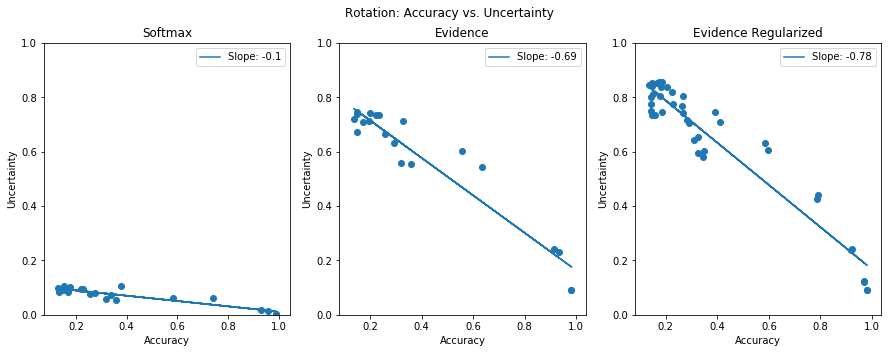

In [8]:
from sklearn.linear_model import LinearRegression
f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax1, ax2, ax3 = ax
ax1.scatter(df1["accuracy"], df1["uncertainty"])
ax2.scatter(df2["accuracy"], df2["uncertainty"])
ax3.scatter(df3["accuracy"], df3["uncertainty"])
reg1 = LinearRegression().fit(np.array(df1["accuracy"]).reshape(-1, 1), np.array(df1["uncertainty"]).reshape(-1, 1))
reg2 = LinearRegression().fit(np.array(df2["accuracy"]).reshape(-1, 1), np.array(df2["uncertainty"]).reshape(-1, 1))
reg3 = LinearRegression().fit(np.array(df3["accuracy"]).reshape(-1, 1), np.array(df3["uncertainty"]).reshape(-1, 1))

ax1.plot(df1["accuracy"], reg1.predict(np.array(df1["accuracy"]).reshape(-1, 1)), label="Slope: {}".format(round(reg1.coef_[0][0], 2)))
ax2.plot(df2["accuracy"], reg2.predict(np.array(df2["accuracy"]).reshape(-1, 1)), label="Slope: {}".format(round(reg2.coef_[0][0], 2)))
ax3.plot(df3["accuracy"], reg3.predict(np.array(df3["accuracy"]).reshape(-1, 1)), label="Slope: {}".format(round(reg3.coef_[0][0],2)))
ax1.set_xlabel("Accuracy")
ax1.set_ylabel("Uncertainty")
ax2.set_xlabel("Accuracy")
ax2.set_ylabel("Uncertainty")
ax3.set_xlabel("Accuracy")
ax3.set_ylabel("Uncertainty")

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
ax3.set_ylim(0, 1)

ax1.set_title("Softmax")
ax2.set_title("Evidence")
ax3.set_title("Evidence Regularized")
ax1.legend()
ax2.legend()
ax3.legend()
plt.suptitle("{}: Accuracy vs. Uncertainty".format(corruption_type.capitalize()))

plt.savefig("figs/paper/{}_acc_vs_unc.pdf".format(corruption_type))

In [9]:
from sklearn.metrics import r2_score

print("Softmax: {}".format(stats.pearsonr(df1["accuracy"], df1["uncertainty"])))
print("Evidence: {}".format(stats.pearsonr(df2["accuracy"], df2["uncertainty"])))
print("Evidence Regularized: {}".format(stats.pearsonr(df3["accuracy"], df3["uncertainty"])))

Softmax: (-0.9158983600643638, 1.46870675964507e-08)
Evidence: (-0.9582147896749043, 3.168415758602078e-11)
Evidence Regularized: (-0.9574269416536517, 4.1946117138340667e-22)


In [10]:
reg.coef_

NameError: name 'reg' is not defined

In [ ]:
reg = LinearRegression().fit(np.array(df2["accuracy"]).reshape(-1, 1), np.array(df2["uncertainty"]).reshape(-1, 1))
reg.coef_

In [ ]:
reg = LinearRegression().fit(np.array(df3["accuracy"]).reshape(-1, 1), np.array(df3["uncertainty"]).reshape(-1, 1))
reg.coef_